# Visualizing Sounds Using Librosa Machine Learning Library

## Goal: 

This notebook demonstrates the analysis of audio files using Librosa library. Librosa allows taking the audio file in its original form and uses trigonometric functions and Python libraries (numpy, scikit, etc.) to analyze sounds instead of the transcribed tabularized version. <br>
Below I test the library with a dolphin sound provided by Benoit. 

In [1]:
import numpy as np
import pandas as pd
import librosa
import os

In [2]:
print(librosa.__version__)

0.8.1


It might be useful to remember what a sine function looks like becasue then we can use it as anology to the sound waves. 

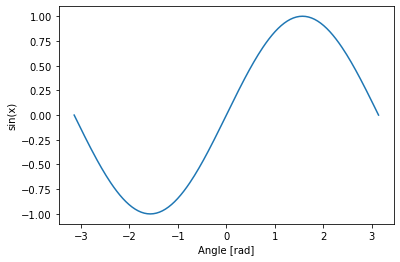

In [3]:
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 201)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

The amplitude of a sound is how high on y-axis the wave climbs and the phase is the periodicity. 

## 1- The "stft" function

### The convensions

* Audio buffers are called y
* Sampling rate is called sr

The STFT (**Shot-time Fourier Transform**) represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows” (Librosa Development Team, 2021). 

The function to use is librosa.stft(). The function returns a complex matrix D. <br>
D[f, t] is the FFT value at frequency f, time (frame) t.

In [4]:
y, sr = librosa.load("C:/Users/deniz/OneDrive/Documents/PythonML/Ubisea/dolph.wav")
D = librosa.stft(y)

In [5]:
s = np.abs(librosa.stft(y)**2) # Get magnitude of stft
chroma = librosa.feature.chroma_stft(S=s, sr=sr)

C:\Users\deniz\.conda\envs\dolphin\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


Chroma transforms sounds into numerical values. The majority of the time, Chroma can become a vector data type. According to documentation, Chroma is a 12-element vector that measures energy from the sound pitch.

In [6]:
print(chroma)

[[0.8693486  0.5598563  0.5156371  ... 0.52830017 0.8026833  0.9832302 ]
 [0.8748952  0.6712465  0.6433349  ... 0.67159957 0.9009042  1.        ]
 [0.90616894 0.80608296 0.7772891  ... 0.8116317  0.9693192  0.94540244]
 ...
 [0.9447959  0.67023546 0.6138048  ... 0.5835949  0.6887359  0.67812574]
 [0.8699365  0.53866786 0.4752065  ... 0.45705083 0.65132654 0.76931167]
 [0.82613444 0.4676984  0.4033381  ... 0.40146258 0.6655919  0.8679292 ]]


A cumulative sum function sums the values of a specific axis: 

In [7]:
chroma = np.cumsum(chroma)

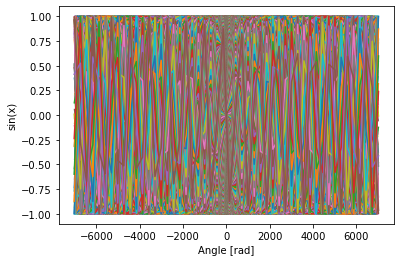

In [8]:
# The following  code visualizes the song: 
import matplotlib.pylab as plt
x = np.linspace(-chroma, chroma)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

[Text(0, 0.5, 'Default chroma')]

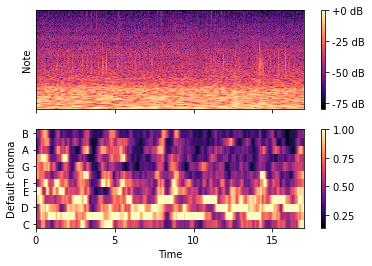

In [9]:
#librosa.display submodule needs to be imported explicitly. 
import librosa.display

chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
# For display purposes, we can zoom into a time frame but the wav file is only 0:17 seconds anyway 
idx = tuple([slice(None), slice(*list(librosa.time_to_frames([0, 17])))])
# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))
fig, ax = plt.subplots(nrows=2, sharex=True)
#setting up to display top graph
img1 = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                                y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()
img2 = librosa.display.specshow(chroma_orig[idx], y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')

Top graph shows amplitude in decibel (dB) units.The below graph is which musical notes librosa "hears" from the dolphins. 


# Conclusion

* Audio files can translate to visuals without the creation of data tables.
* Librosa can generate many views of audio files and become interpreted accordingly.